<a href="https://www.analytiksinc.com">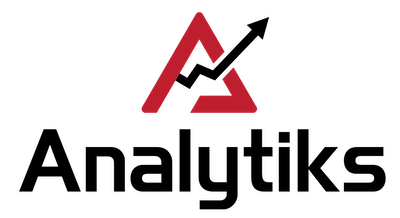</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# DECISION TREE

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

## Load and Explore the Dataset

<a href="https://archive.ics.uci.edu/ml/datasets/Lymphography">**Lymphography Dataset**</a>

In [3]:
#Provide the path of the dataset
df = pd.read_csv("mobile_price_train.csv")

In [4]:
#Check if the dataset loaded correctly
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
#Assess the dataset using .describe() function
df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
#Check the number of features and observations in the dataset
df.shape

(2000, 21)

In [8]:
#Check the number of classes we have
df["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

## Build the Model

In [26]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [27]:
#Split the features and the target column.
X = df.drop(["price_range"], axis=1)
cat = df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]
y = df["price_range"]
x_num = df.drop

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0


In [10]:
from sklearn.model_selection import cross_val_score

In [28]:
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=3, min_samples_leaf=12,
            max_depth=10, random_state=25)

In [29]:
print(np.mean(cross_val_score(clf,X,y,cv=5)))

0.8515


In [13]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [14]:
#Check shape to make sure it is all in order
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 20), (500, 20), (1500,), (500,))

### Train the Model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">**Decision Tree Classifier**</a>

In [15]:
#Instantiate the Algorithm
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

#Train the model
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

## Validate the Model

In [16]:
y_pred = clf.predict(X_test)

In [17]:
#Check the performance metrics
print("{:.2f}".format(metrics.accuracy_score(y_test,y_pred)))

0.84


In [18]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       120
           1       0.81      0.83      0.82       126
           2       0.72      0.75      0.73       114
           3       0.91      0.83      0.87       140

   micro avg       0.84      0.84      0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500




In [19]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[114   6   0   0]
 [ 11 105   9   1]
 [  0  18  85  11]
 [  0   0  24 116]]


In [20]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels, columns=labels)
cm_df

,3,0,1,2
3,114,6,0,0
0,11,105,9,1
1,0,18,85,11
2,0,0,24,116


## Advanced Functions

### Feature Importance 

For evaluating the importance of features on classification task.

In [21]:
#Extract the feature importance
f_importance = clf.feature_importances_

In [22]:
#Put into a DataFrame along with Feature Names for easier understanding.
f_list = X_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

In [24]:
#Sort the values in Descending order (Most Important -> Least Important)
df_feature_importance.sort_values(["Importance"],ascending=False)

,Importance
ram,0.658371
battery_power,0.141275
px_height,0.122123
px_width,0.052387
mobile_wt,0.010240
sc_w,0.003630
talk_time,0.003208
m_dep,0.002407
clock_speed,0.002039
n_cores,0.001549


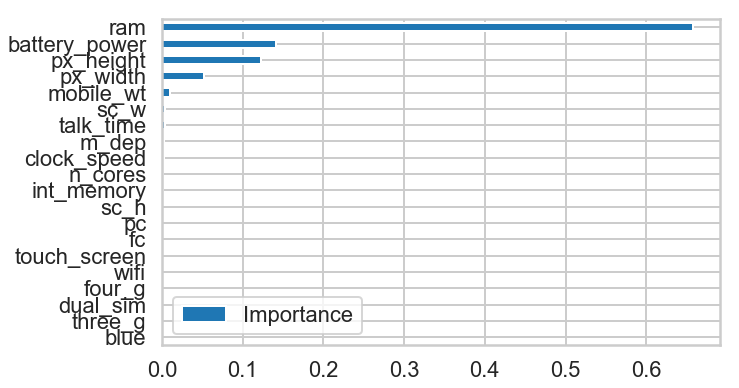

In [25]:
#Visualize importance using a plot, values should be ascending for plotting purposes
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"])
df_feature_importance_asc.plot(kind='barh', figsize=(10,6))
#sns.barplot()

### Visualize the Decision Tree

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
#Get the feature/attribute columns
feature_col = X_train.columns
print (feature_col)

In [ ]:
#Get the class column columns
class_col = pd.unique(y_train)
class_col = np.array(class_col)
class_col = str(class_col).replace(" ", "")
print (type(class_col),class_col)

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=feature_col,
               class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())